# Showing our rough model of ionisation/scintillation for a WIMP and AtmNu signal

In [20]:
import sys
sys.path.append('../src')
from numpy import *
from numpy import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Params import *
from NeutrinoFuncs import *
from WIMPFuncs import *
from PlotFuncs import *
from NeutrinoFuncs import *
from LabFuncs import *
import cmocean
from scipy.spatial import ConvexHull

# Model
m_chi = 1000.0
sigma_p = 1e-48
A_CR = 1.0

# DISCRETISATION
#ne = 70
#nc = 70
ne = 30
nc = 30
np = 100
E_min = 1.0
E_max = 200.0

# Binned rates
E_o_centers,R2 = R_IS_wimp(m_chi,t1,A_CR,E_min,E_max=E_max,\
                           ne=ne,Nuc=Ar40,np=np,CygnusTracking=True,
                          sigma_p=sigma_p)

E_r_centers,costh_centers,R1 = R_Ecosth_wimp(m_chi,t1,A_CR,E_min,E_max=E_max,\
                            ne=ne,nc=nc,Nuc=Ar40,np=np,CygnusTracking=True,
                            sigma_p=sigma_p)

In [21]:
# Binned rates
print('Total rate true = ',sum(R1))
print('Total rate obs = ',sum(R2))

Total rate true =  0.11003275320945419
Total rate obs =  0.005088982168692975


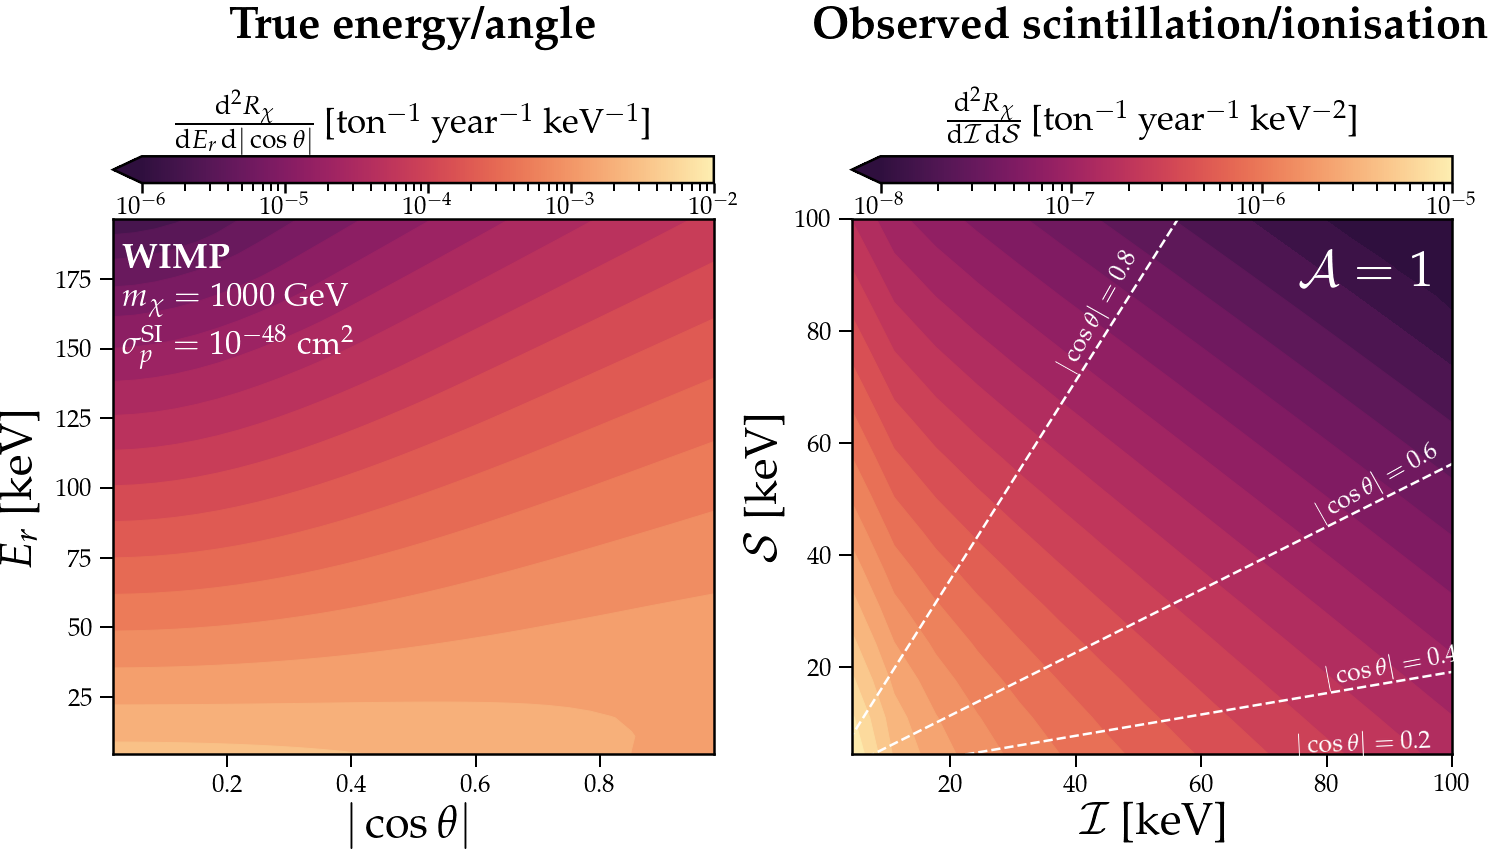

In [23]:
import matplotlib.colors as colors

bw1 = (E_r_centers[1]-E_r_centers[0])*(costh_centers[1]-costh_centers[0])
bw2 = (E_o_centers[1]-E_o_centers[0])**2.0

fig,ax1,ax2 = MyDoublePlot(r'$|\cos{\theta}|$',r'$E_r$ [keV]',r'$\mathcal{I}$ [keV]',r'$\mathcal{S}$ [keV]',size_x=24,wspace=0.23)

cmap = cmocean.cm.matter_r
levels = 20
vmin1 = 1.0e-6
vmax1 = 1.0e-2
vmin2 = 1.0e-8
vmax2 = 1.0e-5
R1_plot = R1*1.0/bw1
R2_plot = R2*1.0/bw2
R1_plot[R1_plot<vmin1] = vmin1
R2_plot[R2_plot<vmin2] = vmin2
norm1 = colors.LogNorm(vmin=vmin1,vmax=vmax1)
norm2 = colors.LogNorm(vmin=vmin2,vmax=vmax2)

im = ax1.pcolormesh(costh_centers,E_r_centers,R1_plot.T,norm=norm1,cmap=cmap)
cnt1 = ax1.contourf(costh_centers,E_r_centers,log10(R1_plot.T),levels=levels,vmin=log10(vmin1),vmax=log10(vmax1),cmap=cmap)
cb1 = cbar(im,extend='min',side="top",orientation="horizontal",pad=0.5)
cb1.set_label(r'$\frac{\mathrm{d}^2R_\chi}{\mathrm{d}E_r \, \mathrm{d}|\cos{\theta}|}$ [ton$^{-1}$ year$^{-1}$ keV$^{-1}$]',labelpad=-124,fontsize=35)


im = ax2.pcolormesh(E_o_centers,E_o_centers,R2_plot.T,norm=norm2,cmap=cmap)
cnt2 = ax2.contourf(E_o_centers,E_o_centers,log10(R2_plot.T),levels=levels,vmin=log10(vmin2),vmax=log10(vmax2),cmap=cmap)
cb2 = cbar(im,extend='min',side="top",orientation="horizontal",pad=0.5)
cb2.set_label(r'$\frac{\mathrm{d}^2R_\chi}{\mathrm{d}\mathcal{I} \, \mathrm{d}\mathcal{S}}$ [ton$^{-1}$ year$^{-1}$ keV$^{-2}$]',labelpad=-124,fontsize=35)

for c in cnt1.collections:
    c.set_edgecolor("face")
for c in cnt2.collections:
    c.set_edgecolor("face")

ax1.tick_params(which='major',direction='out',top=False,right=False)
ax1.tick_params(which='minor',direction='out',top=False,right=False)
ax2.tick_params(which='major',direction='out',top=False,right=False)
ax2.tick_params(which='minor',direction='out',top=False,right=False)

costh_lines = [0.8,0.6,0.4,0.2]
ii_vals = [int(ne*0.73),int(ne*0.78),int(ne*0.60),int(ne*0.52)]
nci = size(costh_lines)

for i in range(0,nci):
    ii = ii_vals[i]
    costh_i = costh_lines[i]
    ax2.plot(E_r_centers*(1-A_CR*costh_i**2.0),E_r_centers*A_CR*costh_i**2.0,'w--',lw=2.5)
    tx_x = E_r_centers[ii]*(1-A_CR*costh_i**2.0)
    tx_y = E_r_centers[ii]*A_CR*costh_i**2.0
    ang = arctan(tx_y/tx_x)*180/pi
    ax2.text(tx_x-2.5,tx_y+2.5,r'$|\cos{\theta}|=$ '+'{0:.1f}'.format(costh_i),fontsize=25,horizontalalignment='right',rotation=ang,verticalalignment='center',rotation_mode="anchor",color='w')
    
ax1.set_title(r'{\bf True energy/angle}',fontsize=45,pad=180)
ax2.set_title(r'{\bf Observed scintillation/ionisation}',fontsize=45,pad=180)
plt.gcf().text(0.13,0.74,r'{\bf WIMP}',fontsize=36,color='w')
plt.gcf().text(0.13,0.685,r'$m_\chi = 1000$ GeV',fontsize=33,color='w')
plt.gcf().text(0.13,0.62,r'$\sigma^{\rm SI}_p =10^{-48}$ cm$^2$',fontsize=33,color='w')
plt.gcf().text(0.89,0.713,r'$\mathcal{A} = 1$',fontsize=50,horizontalalignment='right',color='w')

ax2.set_xlim([E_o_centers[0],100])
ax2.set_ylim([E_o_centers[0],100])


MySaveFig(fig,'IS_distribution_WIMP')


In [25]:
R_wimp1 = R2_plot

In [39]:
Nuc = Ar40
recoildat_fname='AtmNu_Recoils_'+Nuc.Name+'.txt'
recoils = loadtxt(recoil_dir+recoildat_fname)
CygnusTracking = True

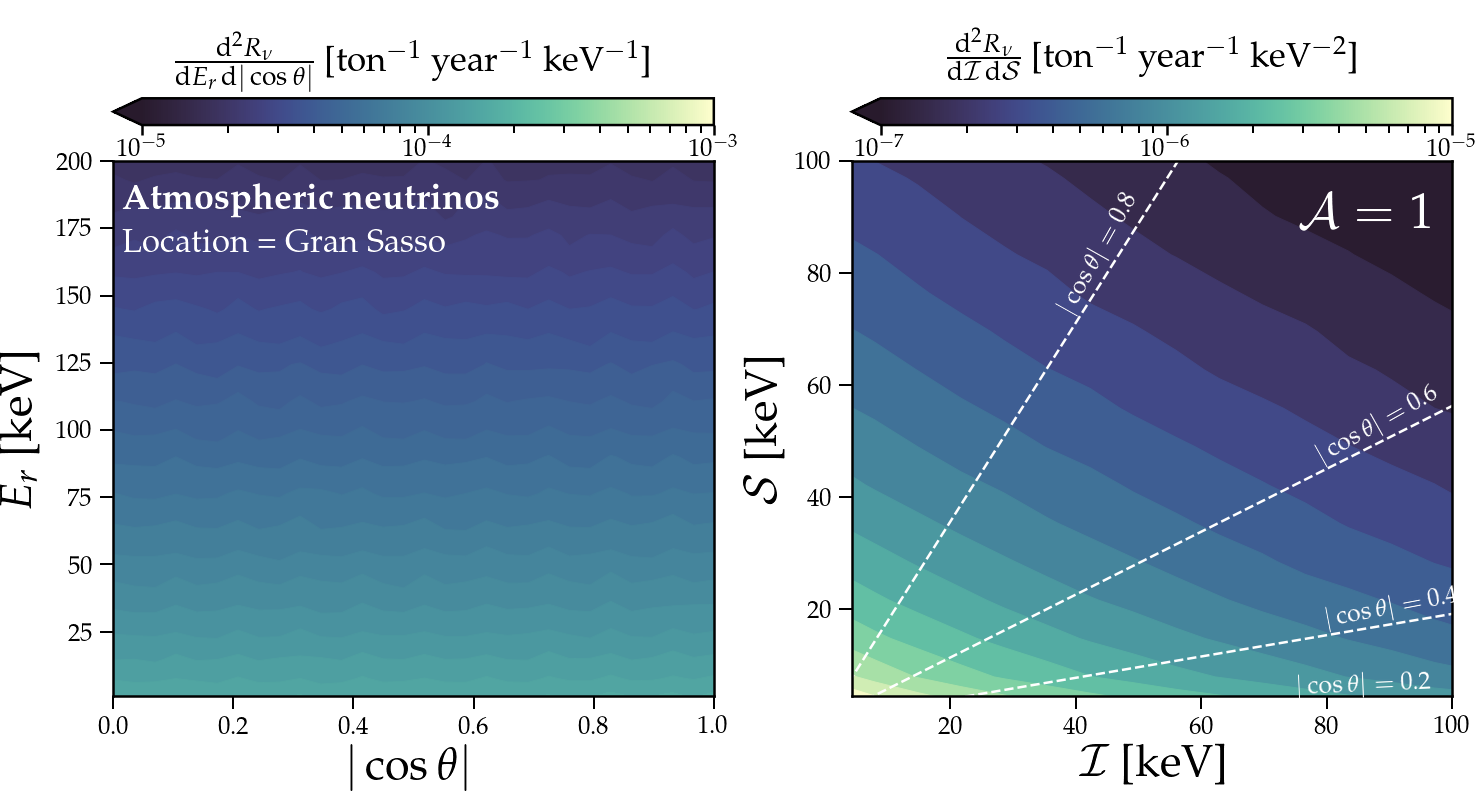

In [40]:
nbins = 30

if CygnusTracking==True:
    costh_gen = abs(recoils[:,4])
else:
    costh_gen = abs(recoils[:,2])

H1,ce,ee = histogram2d(costh_gen,recoils[:,0],bins=(nbins,nbins),range=[[0.0,1.0],[E_min,E_max]])
cc = linspace(0.0,1.0,nbins)
ec = linspace(E_min,E_max,nbins)

I_gen = recoils[:,0]*(1-A_CR*costh_gen**2.0)
S_gen = recoils[:,0]*A_CR*costh_gen**2.0
H2,ie,se = histogram2d(I_gen,S_gen,bins=(nbins,nbins),range=[[E_min/2.0,E_max],[E_min/2.0,E_max]])
ic = linspace(E_min,E_max,nbins)
sc = linspace(E_min,E_max,nbins)

bw1 = (cc[1]-cc[0])*(ec[1]-ec[0])
bw2 = (ic[1]-ic[0])*(sc[1]-sc[0])

R_atm = R_AtmNu(E_min,E_max,Nuc=Nuc)
R2_plot = (R_atm/bw2)*H2/sum(H2)
R1_plot = (R_atm/bw1)*H1/sum(H1)


######


fig,ax1,ax2 = MyDoublePlot(r'$|\cos{\theta}|$',r'$E_r$ [keV]',r'$\mathcal{I}$ [keV]',r'$\mathcal{S}$ [keV]',size_x=24,wspace=0.23)

cmap = cmocean.cm.deep_r
levels = 20
vmin1 = 1.0e-5
vmax1 = 1.0e-3
vmin2 = 1.0e-7
vmax2 = 1.0e-5
R1_plot[R1_plot<vmin1] = vmin1
R2_plot[R2_plot<vmin2] = vmin2
norm1 = colors.LogNorm(vmin=vmin1,vmax=vmax1)
norm2 = colors.LogNorm(vmin=vmin2,vmax=vmax2)

im = ax1.pcolormesh(cc,ec,R1_plot.T,norm=norm1,cmap=cmap,vmin=vmin1,vmax=vmax1)
cnt1 = ax1.contourf(cc,ec,log10(R1_plot.T),levels=levels,vmin=log10(vmin1),vmax=log10(vmax1),cmap=cmap)
cb1 = cbar(im,extend='min',side="top",orientation="horizontal",pad=0.5)
cb1.set_label(r'$\frac{\mathrm{d}^2R_\nu}{\mathrm{d}E_r \, \mathrm{d}|\cos{\theta}|}$ [ton$^{-1}$ year$^{-1}$ keV$^{-1}$]',labelpad=-124,fontsize=35)


im = ax2.pcolormesh(ic,sc,R2_plot.T,norm=norm2,cmap=cmap)
cnt2 = ax2.contourf(ic,sc,log10(R2_plot.T),levels=levels,vmin=log10(vmin2),vmax=log10(vmax2),cmap=cmap)
cb2 = cbar(im,extend='min',side="top",orientation="horizontal",pad=0.5)
cb2.set_label(r'$\frac{\mathrm{d}^2R_\nu}{\mathrm{d}\mathcal{I} \, \mathrm{d}\mathcal{S}}$ [ton$^{-1}$ year$^{-1}$ keV$^{-2}$]',labelpad=-124,fontsize=35)

for c in cnt1.collections:
    c.set_edgecolor("face")
for c in cnt2.collections:
    c.set_edgecolor("face")

ax1.tick_params(which='major',direction='out',top=False,right=False)
ax1.tick_params(which='minor',direction='out',top=False,right=False)
ax2.tick_params(which='major',direction='out',top=False,right=False)
ax2.tick_params(which='minor',direction='out',top=False,right=False)

costh_lines = [0.8,0.6,0.4,0.2]
ii_vals = [int(ne*0.73),int(ne*0.78),int(ne*0.60),int(ne*0.52)]
nci = size(costh_lines)

for i in range(0,nci):
    ii = ii_vals[i]
    costh_i = costh_lines[i]
    ax2.plot(E_r_centers*(1-A_CR*costh_i**2.0),E_r_centers*A_CR*costh_i**2.0,'w--',lw=2.5)
    tx_x = E_r_centers[ii]*(1-A_CR*costh_i**2.0)
    tx_y = E_r_centers[ii]*A_CR*costh_i**2.0
    ang = arctan(tx_y/tx_x)*180/pi
    ax2.text(tx_x-2.5,tx_y+2.5,r'$|\cos{\theta}|=$ '+'{0:.1f}'.format(costh_i),fontsize=25,horizontalalignment='right',rotation=ang,verticalalignment='center',rotation_mode="anchor",color='w')
    
plt.gcf().text(0.13,0.74,r'{\bf Atmospheric neutrinos}',fontsize=36,color='w')
plt.gcf().text(0.13,0.685,r'Location = Gran Sasso',fontsize=33,color='w')
plt.gcf().text(0.89,0.713,r'$\mathcal{A} = 1$',fontsize=50,horizontalalignment='right',color='w')
plt.gcf().text(0.5,0.95,r'|',color='w',fontsize=50,horizontalalignment='right')

ax2.set_xlim([E_o_centers[0],100])
ax2.set_ylim([E_o_centers[0],100])

MySaveFig(fig,'IS_distribution_AtmNu')


In [41]:
R_nu1 = R2_plot

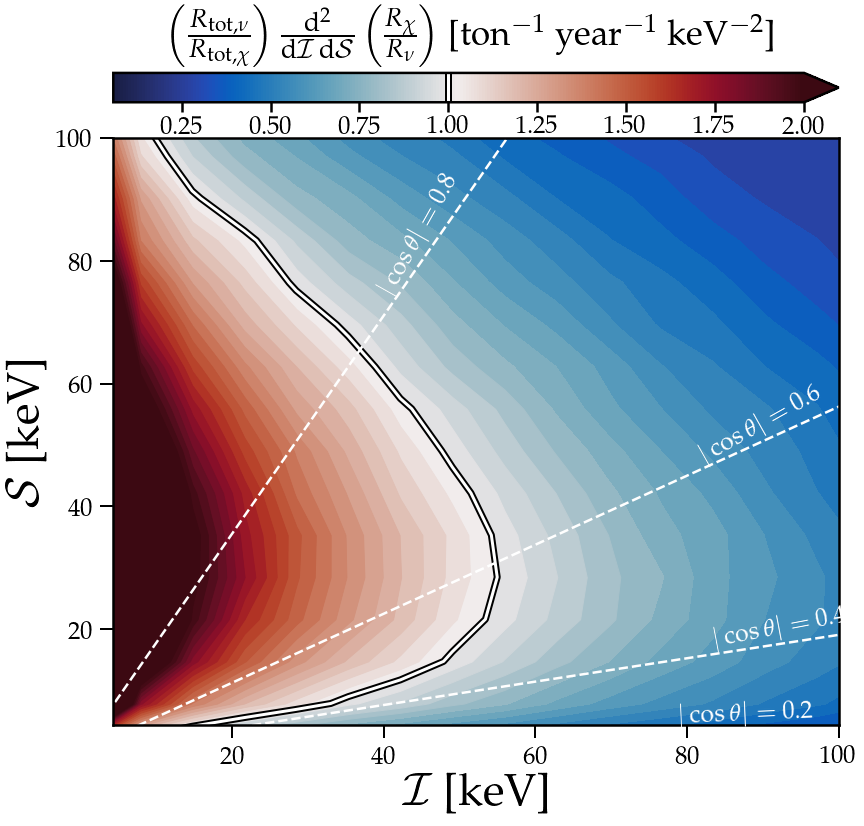

In [97]:
import matplotlib.patheffects as pe
pek=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()]

    
R_wimp1 = R_wimp1/sum(R_wimp1)
R_nu1 = R_nu1/sum(R_nu1)
cmap = cmocean.cm.balance
contrast = R_wimp1/R_nu1

fig,ax1 = MySquarePlot(r'$\mathcal{I}$ [keV]',r'$\mathcal{S}$ [keV]')
im = ax1.pcolormesh(ic,sc,contrast.T,cmap=cmap,vmax=2)
cnt1 = ax1.contourf(ic,sc,contrast.T,levels=100,cmap=cmap,vmax=2)

ax1.contour(ic,sc,contrast.T,levels=[1],colors='k',linewidths=7)
ax1.contour(ic,sc,contrast.T,levels=[1],colors='w',linewidths=3)


for c in cnt1.collections:
    c.set_edgecolor("face")
    
ax1.tick_params(which='major',direction='out',top=False,right=False)
ax1.tick_params(which='minor',direction='out',top=False,right=False)

costh_lines = [0.8,0.6,0.4,0.2]
ii_vals = [int(ne*0.73),int(ne*0.78),int(ne*0.60),int(ne*0.52)]
nci = size(costh_lines)
for i in range(0,nci):
    ii = ii_vals[i]
    costh_i = costh_lines[i]
    ax1.plot(E_r_centers*(1-A_CR*costh_i**2.0),E_r_centers*A_CR*costh_i**2.0,'w--',lw=2.5)
    tx_x = E_r_centers[ii]*(1-A_CR*costh_i**2.0)
    tx_y = E_r_centers[ii]*A_CR*costh_i**2.0
    ang = arctan(tx_y/tx_x)*180/pi
    ax1.text(tx_x-2.5,tx_y+2.5,r'$|\cos{\theta}|=$ '+'{0:.1f}'.format(costh_i),fontsize=25,horizontalalignment='right',rotation=ang,verticalalignment='center',rotation_mode="anchor",color='w')

ax1.set_xlim([E_o_centers[0],100])
ax1.set_ylim([E_o_centers[0],100])

cb2 = cbar(im,extend='max',side="top",orientation="horizontal",pad=0.5)
cb2.set_label(r'$\left( \frac{R_{{\rm tot,}\nu}}{R_{{\rm tot,}\chi}}\right) \frac{\mathrm{d}^2}{\mathrm{d}\mathcal{I} \, \mathrm{d}\mathcal{S}}\left( \frac{R_\chi}{R_\nu}\right)$ [ton$^{-1}$ year$^{-1}$ keV$^{-2}$]',labelpad=-134,fontsize=35)

plt.plot([1,1],[0,5],'-',color='w',lw=3,path_effects=pek)

MySaveFig(fig,'IS_distribution_Contrast')
